<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_Profile_Photos/blob/main/University_Total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

columbia = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_Columbia_Smile.csv")
cornell = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_Cornell_Smile.csv")
dartmouth = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_darthmouth_smile.csv")
harvard = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_Harvard_Smile.csv")
yale = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_Yale_Smile.csv")

df = pd.concat([columbia, cornell])
df = pd.concat([df, dartmouth])
df = pd.concat([df, harvard])
df = pd.concat([df, yale])

## Descriptive Statistics

In [ ]:
df["Smile"].value_counts()

1    379
0    116
Name: Smile, dtype: int64

In [ ]:
df["Smile"].value_counts(normalize=True)

1    0.765657
0    0.234343
Name: Smile, dtype: float64

In [ ]:
df.groupby(["Sex", "Rank"])["Smile"].value_counts(normalize=True)

Sex     Rank       Smile
Female  Assistant  1        0.901408
                   0        0.098592
        Associate  1        0.852941
                   0        0.147059
        Full       1        0.820000
                   0        0.180000
Male    Assistant  1        0.777778
                   0        0.222222
        Associate  1        0.721311
                   0        0.278689
        Full       1        0.696970
                   0        0.303030
Name: Smile, dtype: float64

In [ ]:
df.groupby("Sex")["Smile"].value_counts(normalize=True)

Sex     Smile
Female  1        0.864516
        0        0.135484
Male    1        0.720588
        0        0.279412
Name: Smile, dtype: float64

In [ ]:
df.groupby("Smile")["Sex"].value_counts(normalize=True)

Smile  Sex   
0      Male      0.818966
       Female    0.181034
1      Male      0.646438
       Female    0.353562
Name: Sex, dtype: float64

In [ ]:
df.groupby("University")["Department"].value_counts()

University  Department                                                                                             
Columbia    Management Division                                                                                        27
            Economics Division                                                                                         21
            Finance Division                                                                                           20
            Marketing Division                                                                                         19
            Decision, Risk, and Operations Division                                                                    14
            Accounting Division                                                                                        12
Cornell     accounting                                                                                                 11
            marketing         

In [ ]:
columbia["Rank"].value_counts()

Full         62
Assistant    30
Associate    21
Name: Rank, dtype: int64

In [ ]:
df.groupby("Rank")["Sex"].value_counts()

Rank       Sex   
Assistant  Male       81
           Female     71
Associate  Male       61
           Female     34
Full       Male      198
           Female     50
Name: Sex, dtype: int64

In [ ]:
print(df["Rank"].value_counts(), "\n")
print(df["Sex"].value_counts(), "\n")

print(df["Face"].value_counts(), "\n")
print(df["Smile"].value_counts(), "\n")

print(df["University"].value_counts(), "\n")

Full         248
Assistant    152
Associate     95
Name: Rank, dtype: int64 

Male      340
Female    155
Name: Sex, dtype: int64 

1    495
Name: Face, dtype: int64 

1    379
0    116
Name: Smile, dtype: int64 

Harvard      203
Columbia     113
Yale          72
Dartmouth     54
Cornell       53
Name: University, dtype: int64 



In [ ]:
df.groupby("Sex")["Rank"].value_counts()

Sex     Rank     
Female  Assistant     71
        Full          50
        Associate     34
Male    Full         198
        Assistant     81
        Associate     61
Name: Rank, dtype: int64

# Statistical Test

In [ ]:
from itertools import combinations
from scipy.stats import chi2_contingency

df_s = df[["Rank", "Smile"]]
df_s = df_s.set_index("Rank")

# Get unique levels of Rank
rank_levels = ["Assistant", "Associated", "Full"]

# Perform pairwise chi-square tests
print("Significance results:")
for level in rank_levels:
    # Select rows for the current level
    subset_df = df_s.loc[level]

    # Generate combinations for the selected level
    level_combinations = list(combinations(subset_df.index, 2))

    # Perform chi-square tests for the combinations within the level
    for comb in level_combinations:
        new_df = df_s.loc[list(comb)]
        contingency_table = pd.crosstab(new_df.index, new_df["Smile"])
        chi2, p, dof, ex = chi2_contingency(contingency_table, correction=False)
        print(f"Chi2 result for pair {comb}: {chi2}, p-value: {p}")


Significance results:
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assi

KeyboardInterrupt: 

In [ ]:
from itertools import combinations
from scipy.stats import chi2_contingency

df_s = df[["Rank", "Smile"]]
df_s = df_s.set_index("Rank")


all_combinations = list(combinations(df_s.index, 2))

# Perform pairwise chi-square tests
print("Significance results:")
for comb in all_combinations:
    # Subset df into a DataFrame containing only the pair "comb"
    new_df = df_s.loc[list(comb)]

    # Running chi-square test
    contingency_table = pd.crosstab(new_df["Rank"], new_df["Smile"])
    chi2, p, dof, ex = chi2_contingency(contingency_table, correction=False)

    print(f"Chi2 result for pair {comb}: {chi2}, p-value: {p}")


Significance results:


KeyError: 'Rank'

Smile       0    1
Rank              
Assistant  25  127
Associate  22   73
Full       69  179 

[[ 35.62020202 116.37979798]
 [ 22.26262626  72.73737374]
 [ 58.11717172 189.88282828]]
Chi-square statistic: 6.801228372295345
P-value: 0.033352778853535034
Degrees of freedom: 2
Expected frequencies:
[[ 35.62020202 116.37979798]
 [ 22.26262626  72.73737374]
 [ 58.11717172 189.88282828]]


Text(52.786142361111104, 0.5, 'Number of Professors')

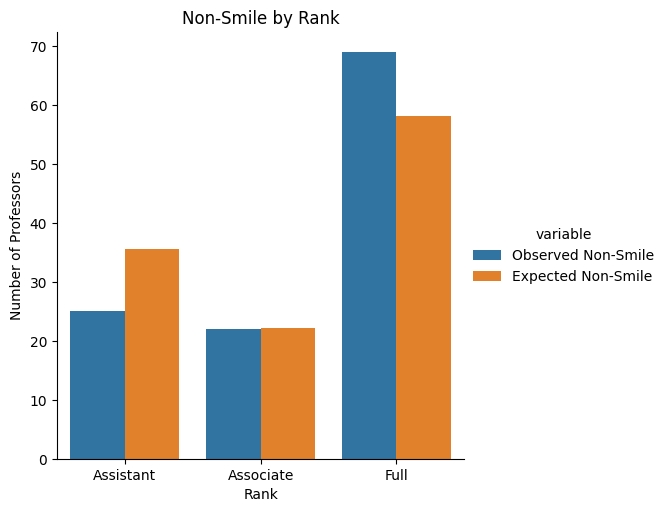

In [ ]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table = pd.crosstab(df["Rank"], df['Smile'])
print(contingency_table, "\n")
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(expected)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

observed = contingency_table.loc[:, 0]
observed = observed.reset_index()
expected = expected[:, 0]

result_df = pd.DataFrame({"Rank":observed["Rank"],
                          "Observed Non-Smile":observed[0],
                          "Expected Non-Smile":expected})

df_1 = pd.melt(result_df, id_vars = "Rank")

df_1

sns.catplot(
    data=df_1, kind="bar",
    x="Rank", y="value", hue="variable")
plt.title("Non-Smile by Rank")
plt.xlabel("Rank")
plt.ylabel("Number of Professors")

Smile    0    1
Sex            
Female  21  134
Male    95  245 

[[ 36.32323232 118.67676768]
 [ 79.67676768 260.32323232]]
Chi-square statistic: 11.502536314320134
P-value: 0.0006950128873661972
Degrees of freedom: 1
Expected frequencies:
[[ 36.32323232 118.67676768]
 [ 79.67676768 260.32323232]]


Text(52.786142361111104, 0.5, 'Number of Professors')

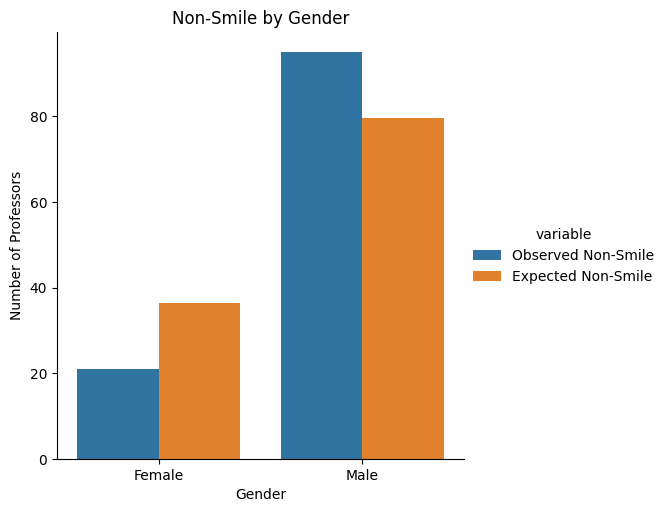

In [ ]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table = pd.crosstab(df["Sex"], df['Smile'])
print(contingency_table, "\n")
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(expected)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

observed = contingency_table.loc[:, 0]
observed = observed.reset_index()
expected = expected[:, 0]

result_df = pd.DataFrame({"Rank":observed["Sex"],
                          "Observed Non-Smile":observed[0],
                          "Expected Non-Smile":expected})

df_1 = pd.melt(result_df, id_vars = "Rank")

df_1

sns.catplot(
    data=df_1, kind="bar",
    x="Rank", y="value", hue="variable")
plt.title("Non-Smile by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Professors")

Smile              0    1
Sex    Rank              
Female Assistant   7   64
       Associate   5   29
       Full        9   41
Male   Assistant  18   63
       Associate  17   44
       Full       60  138 

[[ 16.63838384  54.36161616]
 [  7.96767677  26.03232323]
 [ 11.71717172  38.28282828]
 [ 18.98181818  62.01818182]
 [ 14.29494949  46.70505051]
 [ 46.4        151.6       ]]
Chi-square statistic: 15.500042063525486
P-value: 0.0084263554204051
Degrees of freedom: 5
Expected frequencies:
[[ 16.63838384  54.36161616]
 [  7.96767677  26.03232323]
 [ 11.71717172  38.28282828]
 [ 18.98181818  62.01818182]
 [ 14.29494949  46.70505051]
 [ 46.4        151.6       ]]


Text(0.5, 0.98, 'Non-Smile by Gender and Rank')

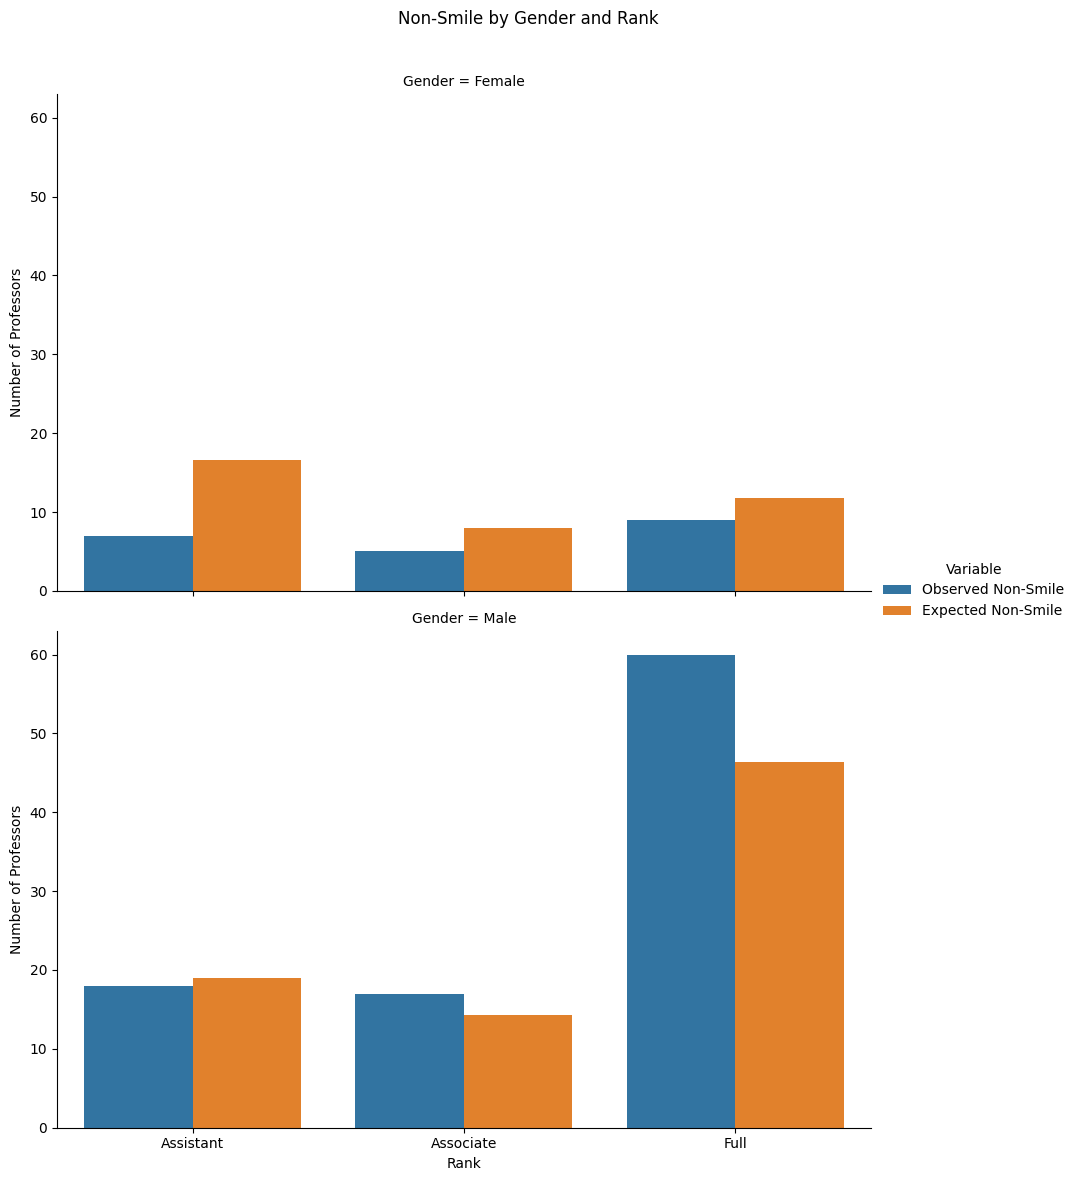

In [ ]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table = pd.crosstab([df["Sex"], df["Rank"]], df['Smile'])
print(contingency_table, "\n")
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(expected)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

observed = contingency_table.loc[:, 0]
observed = observed.reset_index()
expected = pd.Series(expected[:, 0])

result_df = pd.concat([observed, expected], axis=1)
result_df.columns = ["Gender", "Rank", "Observed Non-Smile", "Expected Non-Smile"]
result_df

df_1 = pd.melt(result_df, id_vars = ["Gender", "Rank"])
df_1.columns = ["Gender", "Rank", "Variable", "Number of Professors"]


rel = sns.catplot(
    data=df_1, kind="bar",
    x="Rank", y="Number of Professors", hue="Variable", row="Gender",
    height=6,
    aspect=1.5 )

rel.fig.subplots_adjust(top=.91)
rel.fig.suptitle('Non-Smile by Gender and Rank')


Text(0.5, 0.98, 'Non-Smile by Gender and Rank')

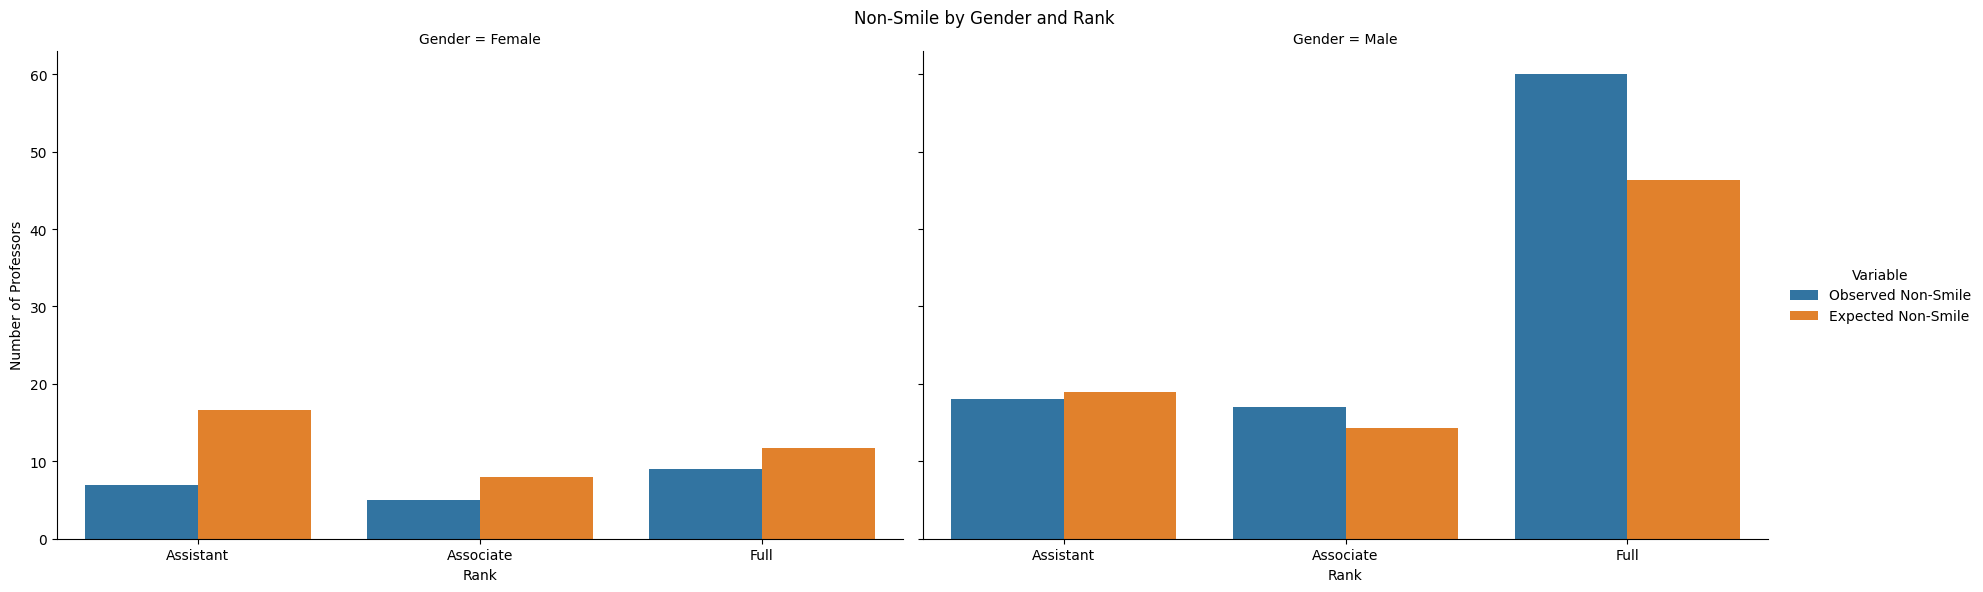

In [ ]:
import seaborn as sns

rel = sns.catplot(
    data=df_1, kind="bar",
    x="Rank", y="Number of Professors", hue="Variable", col="Gender",
    height=6,
    aspect=1.5 )

rel.fig.subplots_adjust(top=.91)
rel.fig.suptitle('Non-Smile by Gender and Rank')


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["Rank"], df['Smile'])
print(contingency_table, "\n")

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Smile       0    1
Rank              
Assistant  25  127
Associate  22   73
Full       69  179 

Chi-square statistic: 6.801228372295345
P-value: 0.033352778853535034
Degrees of freedom: 2
Expected frequencies:
[[ 35.62020202 116.37979798]
 [ 22.26262626  72.73737374]
 [ 58.11717172 189.88282828]]


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["Sex"], df['Smile'])
print(contingency_table, "\n")

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Smile    0    1
Sex            
Female  21  134
Male    95  245 

Chi-square statistic: 11.502536314320134
P-value: 0.0006950128873661972
Degrees of freedom: 1
Expected frequencies:
[[ 36.32323232 118.67676768]
 [ 79.67676768 260.32323232]]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 71
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  495 non-null    object
 1   Name        495 non-null    object
 2   Department  495 non-null    object
 3   Rank        495 non-null    object
 4   Sex         495 non-null    object
 5   Title       495 non-null    object
 6   Pronouns    495 non-null    object
 7   URL         495 non-null    object
 8   Face        495 non-null    int64 
 9   Smile       495 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 42.5+ KB


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming df is your DataFrame
contingency_table = pd.crosstab(df["Rank"], df['Smile'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create DataFrames for observed and expected frequencies
observed_df = pd.DataFrame(contingency_table.values, index=contingency_table.index, columns=contingency_table.columns)
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Column-bind observed and expected DataFrames
comparison_df = pd.concat([observed_df, expected_df], axis=1, keys=['Observed', 'Expected'])

# Print results
print(comparison_df)
print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")


          Observed        Expected            
Smile            0    1          0           1
Rank                                          
Assistant       25  127  35.620202  116.379798
Associate       22   73  22.262626   72.737374
Full            69  179  58.117172  189.882828

Chi-square statistic: 6.801228372295345
P-value: 0.033352778853535034
Degrees of freedom: 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
contingency_table = pd.crosstab(df["Rank"], df['Smile'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create DataFrames for observed and expected frequencies
observed_df = pd.DataFrame(contingency_table.values, index=contingency_table.index, columns=contingency_table.columns)
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)


Smile,index,Rank,0,1
0,0,Assistant,25,127
1,1,Associate,22,73
2,2,Full,69,179


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["Rank"], df['Smile'])
print(contingency_table, "\n")

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Smile       0    1
Rank              
Assistant  25  127
Associate  22   73
Full       69  179 

Chi-square statistic: 6.801228372295345
P-value: 0.033352778853535034
Degrees of freedom: 2
Expected frequencies:
[[ 35.62020202 116.37979798]
 [ 22.26262626  72.73737374]
 [ 58.11717172 189.88282828]]


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
contingency_table = pd.crosstab(df["Rank"], df['Smile'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Phi coefficient
phi_coefficient = np.sqrt(chi2 / len(df))

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
print(f"Phi coefficient: {phi_coefficient}")


Chi-square statistic: 6.801228372295345
P-value: 0.033352778853535034
Degrees of freedom: 2
Expected frequencies:
[[ 35.62020202 116.37979798]
 [ 22.26262626  72.73737374]
 [ 58.11717172 189.88282828]]
Phi coefficient: 0.11721712885737456


In [ ]:
import numpy as np

df["FullorNot"] = np.where(df["Rank"] == "Full", "Full", "Non_Full")

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["FullorNot"], df['Smile'])
print(contingency_table, "\n")

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Smile       0    1
FullorNot         
Full       69  179
Non_Full   47  200 

Chi-square statistic: 4.855132721733416
P-value: 0.027563992985160962
Degrees of freedom: 1
Expected frequencies:
[[ 58.11717172 189.88282828]
 [ 57.88282828 189.11717172]]


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab([df["Sex"], df["Rank"]], df['Smile'])
print(contingency_table, "\n")

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Smile              0    1
Sex    Rank              
Female Assistant   7   64
       Associate   5   29
       Full        9   41
Male   Assistant  18   63
       Associate  17   44
       Full       60  138 

Chi-square statistic: 15.500042063525486
P-value: 0.0084263554204051
Degrees of freedom: 5
Expected frequencies:
[[ 16.63838384  54.36161616]
 [  7.96767677  26.03232323]
 [ 11.71717172  38.28282828]
 [ 18.98181818  62.01818182]
 [ 14.29494949  46.70505051]
 [ 46.4        151.6       ]]


In [ ]:
from itertools import combinations
from scipy.stats import chi2_contingency

df_s = df[["Rank", "Smile"]]
df_s = df_s.set_index("Rank")

# Get unique levels of Rank
rank_levels = ["Assistant", "Associated", "Full"]

# Perform pairwise chi-square tests
print("Significance results:")
for level in rank_levels:
    # Select rows for the current level
    subset_df = df_s[df_s.index == level]

    # Generate combinations for the selected level
    level_combinations = list(combinations(subset_df.index, 2))

    # Perform chi-square tests for the combinations within the level
    for comb in level_combinations:
        new_df = df_s.loc[list(comb)]
        contingency_table = pd.crosstab(new_df.index, new_df["Smile"])
        chi2, p, dof, ex = chi2_contingency(contingency_table, correction=False)
        print(f"Chi2 result for pair {comb}: {chi2}, p-value: {p}")


Streaming output truncated to the last 5000 lines.
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result for pair ('Assistant', 'Assistant'): 0.0, p-value: 1.0
Chi2 result

KeyboardInterrupt: 